In [1]:
from utilites import *
import algorithmes
directions = [(0, 1), (1, 0), (-1, 0), (0, -1)]
cote = ["haut", "droite", "gauche", "bas"]


directions = [(0, 1), (1, 0), (-1, 0), (0, -1)]
cote = ["haut", "droite", "gauche", "bas"]


def dessineNoeud(n: Noeud, murs: list) -> None:
    """
        Décrit les points à tracer pour déssiner une cellule d'un pseudolabyrinthe 

        @param n:Noeud  le noeud à dessiner
        @param murs:list  une list de vecteurs de directions ou se trouve les murs
        @return une list de tuple des points à relier pour tracer les bords
    """
    lines = []
    for m in murs:
        if m == (-1, 0):
            lines.append([n.get_id(), (n.get_id()[0], n.get_id()[1]+1)])
        elif m == (1, 0):
            lines.append([(n.get_id()[0]+1, n.get_id()[1]),
                         (n.get_id()[0]+1, n.get_id()[1]+1)])
        elif m == (0, 1):
            lines.append([(n.get_id()[0], n.get_id()[1]+1),
                         (n.get_id()[0]+1, n.get_id()[1]+1)])
        elif m == (0, -1):
            lines.append([n.get_id(), (n.get_id()[0]+1, n.get_id()[1])])
    return lines


def afficheLaby(pl: PseudoLabyrinthe) -> list:
    """
        Affiche un pseudo-labyrinthe
        Important: A utiliser avec une console Sage-Math
        @param pl:PseudoLabyrinthe   le labyrinthe à afficher
    """
    plot = line2d([(0, 0), (0, 0)], xmin=0, xmax=pl.get_taille()[0], ymin=0, ymax=pl.get_taille()[1])
    for n in pl.get_noeuds():
        connexions = n.get_connexions()
        nid = n.get_id()
        vectors = [(node.get_id()[0]-nid[0], node.get_id()[1]-nid[1]) for node in connexions]
        murs = []
        for v in directions:
            if v not in vectors:
                murs.append(directions[directions.index(v)])
        for m in murs:
            if (0<=nid[0]+m[0]<pl.get_taille()[0] and 0<=nid[1]+m[1]<pl.get_taille()[1]):
                if n in pl.get_noeud_par_id((nid[0]+m[0],nid[1]+m[1])).get_connexions():
                    murs.remove(m)
        lines = dessineNoeud(n, murs)
        for line in lines:
            plot += line2d(line)
    return plot


In [2]:
N = 5
M = 3

pl = PseudoLabyrinthe((N,M))
pl.get_noeud_par_id((0,0)).ajoute_connexions((pl.get_noeud_par_id((0,1))))
pl.get_noeud_par_id((0,0)).ajoute_connexions((pl.get_noeud_par_id((1,0))))

pl.get_noeud_par_id((4,2)).ajoute_connexions((pl.get_noeud_par_id((3,2))))

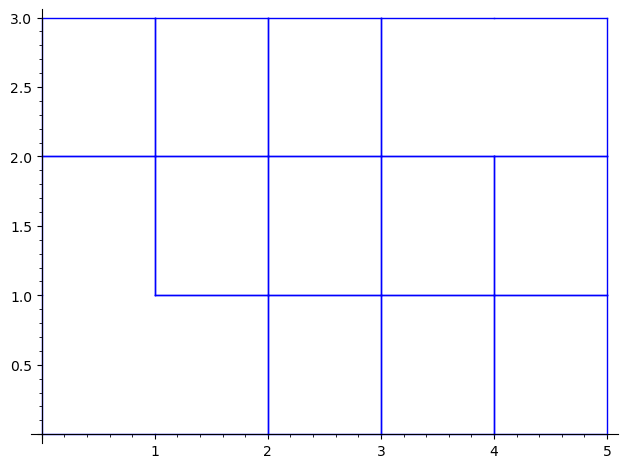

In [3]:
afficheLaby(pl)

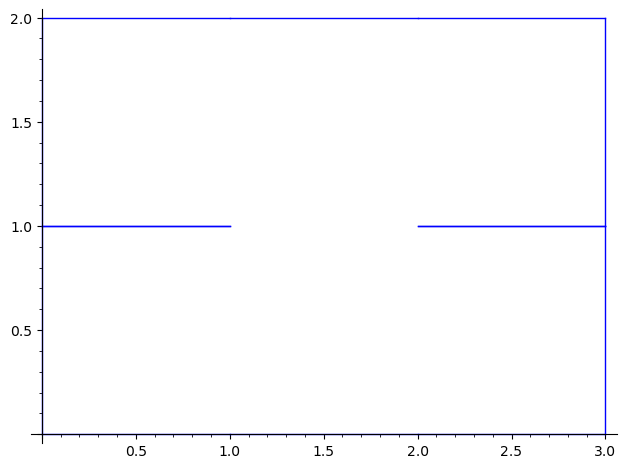

In [4]:
pl2=algorithmes.construit_pseudo_labyrinthe_vide((3,2))
pl2.ajoute_murs((pl2.get_noeud_par_id((0,0)),pl2.get_noeud_par_id((0,1)) ), (pl2.get_noeud_par_id((2,0)),pl2.get_noeud_par_id((2,1))))
afficheLaby(pl2)

In [5]:
mat2=algorithmes.construit_matrice_labyrinthes((3,2))
l2=[algorithmes.murs_to_PseudoLabyrinthe(m,(3,2)) for m in mat2]
len(l2)

128

In [6]:
l_lab=algorithmes.get_Labyrinthes((3,2))
len(l_lab)

15

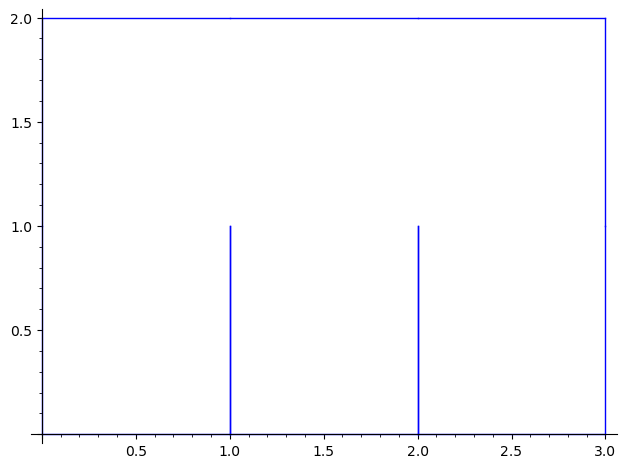

In [7]:
mat=algorithmes.construit_matrice_labyrinthes((3,2))
l=[algorithmes.murs_to_PseudoLabyrinthe(m,(3,2)) for m in mat]
afficheLaby(l[10])